### Universidade Federal do Maranhão

### Centro de Ciência Exatas e Tecnologia

---

Identificação do Projeto:

Sistema de Acompanhamento de Temperatura em Tempo Real
com Alerta via Bluetooth e Wi-Fi


Discentes:
* Fernanda Sousa de Assunção Vale
* Isabel Silva de Araujo
* Leonardo Victor dos Santos Sá Menez
* Lucas Martins Campos Matos
* Vitor Ferreira Nunes

# Estudo da plataforma InterSCity

Baseado em microserviços

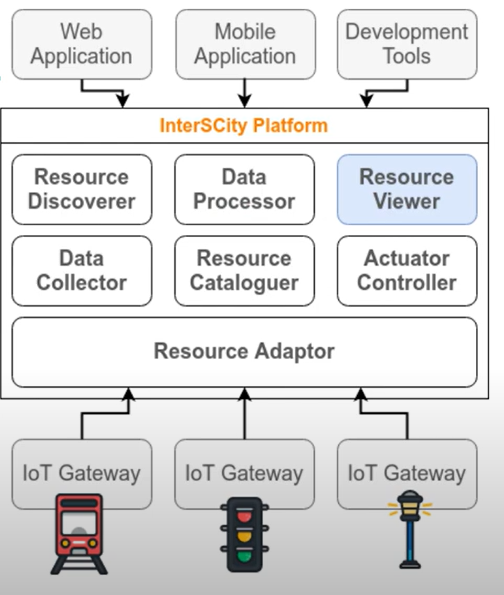

### 1. Resource Adaptor
Responsavel pelo proxy do IOT
1.   Registrar / atualizar recursos
2.   Enivar dados pra plataforma



## 2. Resource Catalog
Responsavel por armazenar dados estáticos (metadados)

Criar UUIDs de cada recursos que vai ser utilizado

Notificação dos recursos na plataforma

##  3. Data Collector

Armazenar dados dos sensores

Permitir consultar os dados no atuais e anteriores


## 4. Resource Discoverer

Auxilia na descoberta de recursos através de filtros

Uso de filtros:
* Localização
* Tipo de capacidade
* Faixa de valores para uma dada capacidade

##5. Actuator Controller

Responsável por gerenciar atuações

registra o webHook no sistema e a interSCity pode fazer o controle

Faz registros das atuações para auditoria

## 6. Data Processor
Analisar dados

Processamento em cluster

Uso de interface web para não usar Apache Spark

## 7. Resource Viewer

Apresentar visualizações dos dados
1.   Tempo real
2.   Históricos
3.   Gráficos



# Aplicação para nosso projeto


In [30]:
!pip install -q requests

In [31]:
import requests
import json

In [32]:
# Endereço para a api
api = 'https://cidadesinteligentes.lsdi.ufma.br/interscity_lh'

In [33]:
# teste de ip
!apt-get update
!apt-get install -y iputils-ping

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,519 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,859 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Fe

In [34]:
!ping -c 1 google.com

PING google.com (74.125.141.100) 56(84) bytes of data.
64 bytes from vl-in-f100.1e100.net (74.125.141.100): icmp_seq=1 ttl=114 time=2.10 ms

--- google.com ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 2.104/2.104/2.104/0.000 ms


In [35]:
!ping -c 1 playground.interscity.org
!ping -c 1 192.168.10.104

PING playground.interscity.org (143.107.45.126) 56(84) bytes of data.

--- playground.interscity.org ping statistics ---
1 packets transmitted, 0 received, 100% packet loss, time 0ms

PING 192.168.10.104 (192.168.10.104) 56(84) bytes of data.

--- 192.168.10.104 ping statistics ---
1 packets transmitted, 0 received, 100% packet loss, time 0ms



### Capacidade

In [37]:
# Cria uma 'capability'

# Playground - Resource Catalog - Post - Catalog capabilities
capability_temp_json = {
  "name": "rooom/temperature",
  "description": "mede a temperatura em graus celsius (int)",
  "capability_type": "sensor"
}

r = requests.post(f"{api}/catalog/capabilities/", json=capability_temp_json)
if(r.status_code == 201):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

ConnectionError: HTTPSConnectionPool(host='cidadesinteligentes.lsdi.ufma.br', port=443): Max retries exceeded with url: /interscity_lh/catalog/capabilities/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7885e8ff3ad0>: Failed to resolve 'cidadesinteligentes.lsdi.ufma.br' ([Errno -2] Name or service not known)"))

In [ ]:
# Exibe as 'capabilities'

# Playground - Resource Catalog - Get - Catalog capabilities

r = requests.get(api+'/catalog/capabilities')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

ConnectionError: HTTPSConnectionPool(host='cidadesinteligentes.lsdi.ufma.br', port=443): Max retries exceeded with url: /interscity_lh/catalog/capabilities (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7885e901c090>: Failed to resolve 'cidadesinteligentes.lsdi.ufma.br' ([Errno -2] Name or service not known)"))

### Recurso

In [ ]:
# Cria um 'resource'

# Playground - Resource Catalog - Post - Catalog resource

resource_termometro01_json = {
  "data": {
    "description": "Sensor de Temperatura 01",
    "capabilities": ["rooom/temperature"],
    "status": "active",
    "collect_interval": 30,
    "lat": -3.559616,
    "lon": -6.731386
  }
}
r = requests.post(api+'/catalog/resources', json=resource_termometro01_json)
uuid = ''
if(r.status_code == 201):
  resource = json.loads(r.text)
  uuid = resource['data']['uuid']
  print(json.dumps(resource, indent=2))
else:
  print('Status code: '+str(r.status_code))

{
  "data": {
    "id": 7,
    "uri": null,
    "created_at": "2025-01-09T20:26:53.708Z",
    "updated_at": "2025-01-09T20:26:53.708Z",
    "lat": -3.559616,
    "lon": -6.731386,
    "status": "active",
    "collect_interval": 30,
    "description": "Sensor de Temperatura 01",
    "uuid": "31fdb4e8-8fdc-4704-9f83-b5d31ff0a444",
    "city": null,
    "neighborhood": null,
    "state": null,
    "postal_code": null,
    "country": null,
    "capabilities": [
      "rooom/temperature"
    ]
  }
}


In [ ]:
# Exibe os 'resources'

# Playground - Resource Catalog - Get - Catalog resource

r = requests.get(api+'/catalog/resources')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

Status code: 404


### Criando dados


In [ ]:
# Adiciona dado da 'capability' ao 'resource'

# Playground - Resource Adaptor - Post - Adaptor resources

capability_data_json = {
  "data": [
    {
      "room/temperature": 25,
      "timestamp": "2024-03-26T23:03:23.609Z"
    },
    {
      "room/temperature": 26,
      "timestamp": "2020-11-26T17:32:25.428Z"
    }
  ]
}
r = requests.post(api+'/adaptor/resources/'+"31fdb4e8-8fdc-4704-9f83-b5d31ff0a444"+'/data/environment_monitoring', json=capability_data_json)
if(r.status_code == 201):
  print('Ok')
else:
  print('Status code: '+str(r.status_code))

Ok


In [ ]:
# Exibe dados do 'resource'

# Playground - Data collector - Post - Resources data

r = requests.post(api+'/collector/resources/'+"31fdb4e8-8fdc-4704-9f83-b5d31ff0a444"+'/data')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "resources": [
    {
      "capabilities": {
        "environment_monitoring": [
          {
            "date": "2024-03-26T23:03:23.609Z",
            "room/temperature": 25
          },
          {
            "date": "2020-11-26T17:32:25.428Z",
            "room/temperature": 26
          }
        ]
      },
      "uuid": "31fdb4e8-8fdc-4704-9f83-b5d31ff0a444"
    }
  ]
}


Após o teste inicial com dois dados, faremos o envio da série de dados rotulados completa através da API do InterSCity.

In [ ]:
def send_data_to_intescity(df):
  for_, row in df.iterrows():
    payload = {
        "capabilities": row["payload"]
        "timestamp": row["timestamp"],
    }

    response = request.post(f"{api}/adaptor/resources " + "31fdb4e8-8fdc-4704-9f83-b5d31ff0a444" +"/data/data_envimoradglkad", json=payload)

    if response.status_code == 201:
      print(f"Dados enviados com sucesso: {payload}")
    else:
      print(f"Erro ao enviar os dados: {payload}. Status code: {response.status_code}. Response: {response}")

In [ ]:
!pip install paho-mqtt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
import time
import pandas as pd
from datetime import datetime
from paho.mqtt import client as mqtt_client

# Configurações de conexão ao Broker
broker = 'broker.hivemq.com'
port = 1883
temperature_topic = "salacrit_temperatura"
humidity_topic = "salacrit_umidade"
client_id = 'python-unique-id'  # ID do cliente Python (deve ser único)

data = []

# Realiza conexão ao Broker
def connect_mqtt():
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Conectado ao Broker MQTT")
        else:
            print("Falha ao conectar, código de retorno %d\n", rc)

    client = mqtt_client.Client(mqtt_client.CallbackAPIVersion.VERSION1, client_id)
    client.on_connect = on_connect
    client.connect(broker, port)
    return client

# Realiza subscribe ao Tópico
def subscribe(client):
    def on_message(client, userdata, msg):
        print(f"Recebido o dado `{msg.payload.decode()}` do tópico `{msg.topic}`")
        data.append({
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "topic": msg.topic,
        "payload": msg.payload.decode()
        })

    client.subscribe(temperature_topic)
    client.subscribe(humidity_topic)
    client.on_message = on_message

def save_data_to_csv(filename='data_mqtt.csv'):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Dados salvos no arquivo {filename}")

def run():
    client = connect_mqtt()
    subscribe(client)
    client.loop_start()


    try:
        while True:
            time.sleep(60)  # Ajuste o intervalo conforme necessário
            save_data_to_csv()
    except KeyboardInterrupt:
        print("Interrompido pelo usuário")
        client.loop_stop()
        df = save_data_to_csv()
        send_data_to_intescity(df)

if __name__ == '__main__':
    run()



<ipython-input-5-1d782adacd70>:23: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt_client.Client(mqtt_client.CallbackAPIVersion.VERSION1, client_id)


Conectado ao Broker MQTT
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacrit_temperatura`
Recebido o dado `56.00` do tópico `salacrit_umidade`
Recebido o dado `27.00` do tópico `salacri

In [ ]:
# Exibe dados do 'resource'

# Playground - Data collector - Post - Resources data

r = requests.post(f"{api}/adaptor/resources" + "31fdb4e8-8fdc-4704-9f83-b5d31ff0a444" + "/data")
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))